# File for looking at simplistic target distance #

- using the data_processed/processed_combos_syntoxtargallpw_string.csv
- compare distributions of toxicity categories based on average string target distance

In [13]:
# Import everything needed
from matplotlib.patches import Patch
from scipy import stats
from statsmodels.stats.multitest import multipletests
from toxicity_ranking import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp
import seaborn as sns

In [14]:
drug_syntox_df = pd.read_csv('data_processed/processed_combos_syntoxtargallpw_string.csv')
drug_syntox_df

,drug_row,drug_col,cell_line_name,synergy_zip,synergy_loewe,synergy_bliss,synergy_hsa,toxicity_category,avg_short_path_btwn_targets,min_short_path_btwn_targets
0,mefloquine,tamoxifen,TC-32,19.667559,2.263512,25.542924,2.896978,Moderate,2.500000,2.0
1,chloroquine,tamoxifen,TC-32,8.836970,-0.671750,11.944238,-0.517536,Major,2.466667,1.0
2,prochlorperazine,tamoxifen,TC-32,12.411371,1.358891,14.291624,0.880952,Moderate,2.525000,2.0
3,fingolimod,tamoxifen,TC-32,8.007900,-0.764699,5.141360,-0.060902,Major,2.540000,1.0
4,dasatinib,tamoxifen,TC-32,-9.601561,0.314544,-5.351887,0.710809,Moderate,2.117391,1.0
...,...,...,...,...,...,...,...,...,...,...
32054,sunitinib,nilutamide,CBRC058,10.012172,7.477252,-6.487555,-8.811142,Moderate,2.000000,2.0
32055,sunitinib,midostaurin,CBRC058,-15.618223,-46.106561,-80.053050,-73.693958,Moderate,1.775510,1.0
32056,vincristine,midostaurin,CBRC058,10.768074,5.982307,8.609542,3.406801,Moderate,2.083333,2.0
32057,ceritinib,ponatinib,RD,11.951861,-2.135860,11.637520,-1.042661,Major,1.800000,1.0


(array([1.9500e+02, 4.0000e+00, 2.0060e+03, 2.2790e+03, 3.4310e+03,
        1.2618e+04, 4.5670e+03, 2.5660e+03, 1.7180e+03, 7.6900e+02,
        1.4400e+03, 4.2000e+01, 1.5000e+01, 1.0000e+00, 0.0000e+00,
        2.8000e+01, 6.0000e+00, 3.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

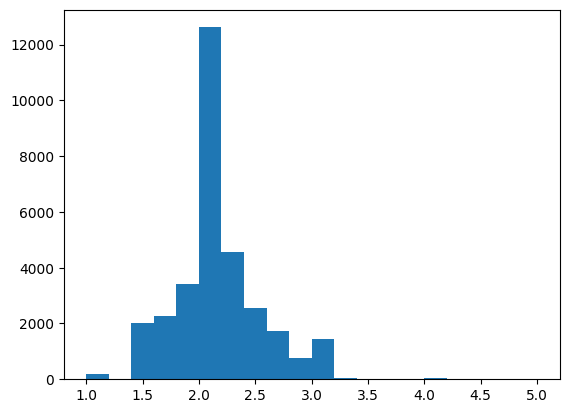

In [15]:
# Look at histogram of target target distances
plt.hist(drug_syntox_df['avg_short_path_btwn_targets'], bins=20)

(array([1.3402e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.6840e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.4140e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

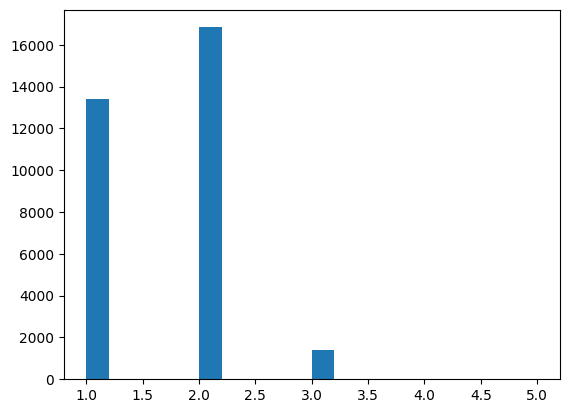

In [16]:
# Look at histogram of pathway target distances
plt.hist(drug_syntox_df['min_short_path_btwn_targets'], bins=20)

Then break down the dataset in different ways and see if there are any correlations. None of these target distances are a normal distribution, so probably look at using a Kruskal Wallis test:
1. Break down by Major, Moderate, Minor toxicity, is there any difference in Jaccard similarity by these groups?

In [25]:
# Run Kruskal Wallis test on average drug target distances with Major, Moderate, and Minor toxicity

# Average target distance
major_target = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Major']['avg_short_path_btwn_targets'].dropna()
moderate_target = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Moderate']['avg_short_path_btwn_targets'].dropna()
minor_target = drug_syntox_df[drug_syntox_df['toxicity_category'] == 'Minor']['avg_short_path_btwn_targets'].dropna()
print(f'Major avg target distance: {len(major_target)}')
print(f'Moderate avg target distance: {len(moderate_target)}')
print(f'Minor avg target distance: {len(minor_target)}')

h_statistic_target_tox, p_value_target_tox = stats.kruskal(major_target, moderate_target, minor_target)
print(f'Kruskal-Wallis H statistic for avg target distance: {h_statistic_target_tox}')
print(f'P-value for avg target distance: {p_value_target_tox}')

# Filter drug_syntox_df for only Major, Moderate, and Minor toxicity categories and remove pairs with average target distances of None
drug_syntox_df_tox_target = drug_syntox_df[drug_syntox_df['toxicity_category'].isin(['Major', 'Moderate', 'Minor'])]
drug_syntox_df_tox_target = drug_syntox_df_tox_target[~drug_syntox_df_tox_target['avg_short_path_btwn_targets'].isnull()]
dunn_target_tox = sp.posthoc_dunn(drug_syntox_df_tox_target, val_col='avg_short_path_btwn_targets', group_col='toxicity_category', p_adjust='bonferroni')
print('Dunn post-hoc test for avg target distance:' + str(dunn_target_tox))

# jonkcheere terpestra test -- is there a trend in the average target distance as you increase toxicity from minor to major?
atdist_major_samples = major_target.values.tolist()
atdist_moderate_samples = moderate_target.values.tolist()
atdist_minor_samples = minor_target.values.tolist()
jt_incr_target = jonckheere_terpestra_test([atdist_minor_samples, atdist_moderate_samples, atdist_major_samples])
print(f"Increasing toxicity for avg target distance p value: {jt_incr_target[1]:0.3e}")
jt_decr_target = jonckheere_terpestra_test([atdist_major_samples, atdist_moderate_samples, atdist_minor_samples])
print(f"Decreasing toxicity for avg target distance p value: {jt_decr_target[1]:0.3e}")

# Run an ANOVA on average drug target distances for Major, Moderate, and Minor toxicity categories
f_statistic_anova_target_tox, p_value_anova_target_tox = stats.f_oneway(major_target, moderate_target, minor_target)
print(f'ANOVA F-statistic for avg target distance: {f_statistic_anova_target_tox}')
print(f'P-value for avg target distance: {p_value_anova_target_tox}')

# Run a T test on average drug target distances between Major/Minor, Major/Moderate, and Moderate/Minor toxicity categories
major_minor_target = stats.ttest_ind(major_target, minor_target)
major_moderate_target = stats.ttest_ind(major_target, moderate_target)
moderate_minor_target = stats.ttest_ind(moderate_target, minor_target)

# Run bonferroni correction on the p-values
ttest_p_values = [major_minor_target[1], major_moderate_target[1], moderate_minor_target[1]]
ttest_p_values_corrected = multipletests(ttest_p_values, method='bonferroni')
print(f'Major/Minor T-test: {major_minor_target[1]} Corrected: {ttest_p_values_corrected[1][0]}')
print(f'Major/Moderate T-test: {major_moderate_target[1]} Corrected: {ttest_p_values_corrected[1][1]}')
print(f'Moderate/Minor T-test: {moderate_minor_target[1]} Corrected: {ttest_p_values_corrected[1][2]}')

with open('results/avg_targ_distance_analysis/avg_targ_distance_tox_ddinter.tsv', 'w') as f:
    f.write('Level\tTest\tTest statistic\tP-value\n')
    f.write(f'Target\tKruskal-Wallis\t{h_statistic_target_tox}\t{p_value_target_tox}\n')
    f.write(f'Target\tDunn post-hoc\tMajor/Minor\t{dunn_target_tox.iloc[0, 1]}\n')
    f.write(f'Target\tDunn post-hoc\tMajor/Moderate\t{dunn_target_tox.iloc[0, 2]}\n')
    f.write(f'Target\tDunn post-hoc\tModerate/Minor\t{dunn_target_tox.iloc[1, 2]}\n')
    f.write(f'Target\tJonckheere-Terpstra Increasing toxicity\t{jt_incr_target[0]}\t{jt_incr_target[1]:0.3e}\n')
    f.write(f'Target\tJonckheere-Terpstra Decreasing toxicity\t{jt_decr_target[0]}\t{jt_decr_target[1]:0.3e}\n')
    f.write(f'Target\tANOVA\t{f_statistic_anova_target_tox}\t{p_value_anova_target_tox}\n')
    f.write(f'Target\tT-test (bonf cor)\tMajor/Minor\t{ttest_p_values_corrected[1][0]}\n')
    f.write(f'Target\tT-test (bonf cor)\tMajor/Moderate\t{ttest_p_values_corrected[1][1]}\n')
    f.write(f'Target\tT-test (bonf cor)\tModerate/Minor\t{ttest_p_values_corrected[1][2]}\n')




Major avg target distance: 6016
Moderate avg target distance: 24846
Minor avg target distance: 831
Kruskal-Wallis H statistic for avg target distance: 298.2652844464412
P-value for avg target distance: 1.7081122637416406e-65
Dunn post-hoc test for avg target distance:                 Major         Minor      Moderate
Major     1.000000e+00  1.506407e-49  4.236907e-38
Minor     1.506407e-49  1.000000e+00  1.819917e-24
Moderate  4.236907e-38  1.819917e-24  1.000000e+00
Increasing toxicity for avg target distance p value: 0.000e+00
Decreasing toxicity for avg target distance p value: 1.000e+00
ANOVA F-statistic for avg target distance: 115.85199454012738
P-value for avg target distance: 7.398835352912383e-51
Major/Minor T-test: 2.8951775244722522e-34 Corrected: 8.685532573416756e-34
Major/Moderate T-test: 6.143765938375886e-33 Corrected: 1.843129781512766e-32
Moderate/Minor T-test: 1.768197808060669e-17 Corrected: 5.3045934241820064e-17


2. Could try to do a continuous correlation between synergy scores and average target distance distributions between these groups
    1. Do for Bliss, HSA, ZIP, Loewe synergy scores

In [18]:
# Let's plot target distances against bliss synergy scores
plt.scatter(drug_syntox_df['avg_short_path_btwn_targets'], drug_syntox_df['synergy_bliss'])
plt.xlabel('Drug Combination Average Target Distance')
plt.ylabel('Bliss Synergy Score')
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/bliss_v_avgtargdist_ddinter_scatter.png', dpi=700)
plt.close()

# Calculate Pearson correlation coefficient between Average Target Distance and bliss synergy score
avg_targ_dist_bliss_corr = drug_syntox_df['avg_short_path_btwn_targets'].corr(drug_syntox_df['synergy_bliss'])
print(f'Pearson correlation coefficient between Average Target Distance and bliss synergy score: {avg_targ_dist_bliss_corr}')

# Calculate Spearman correlation coefficient between Average Target Distance and bliss synergy score
avg_targ_dist_bliss_spearman_corr = drug_syntox_df['avg_short_path_btwn_targets'].corr(drug_syntox_df['synergy_bliss'], method='spearman')
print(f'Spearman correlation coefficient between Average Target Distance and bliss synergy score: {avg_targ_dist_bliss_spearman_corr}')


Pearson correlation coefficient between Average Target Distance and bliss synergy score: -0.08043113922619997
Spearman correlation coefficient between Average Target Distance and bliss synergy score: -0.04835188981440892


In [19]:
# Let's plot target distances against HSA synergy scores
plt.scatter(drug_syntox_df['avg_short_path_btwn_targets'], drug_syntox_df['synergy_hsa'])
plt.xlabel('Drug Combination Average Target Distance')
plt.ylabel('HSA Synergy Score')
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/hsa_v_avgtargdist_ddinter_scatter.png', dpi=700)
plt.close()

# Calculate Pearson correlation coefficient between Average Target Distance and HSA synergy score
avg_targ_dist_hsa_corr = drug_syntox_df['avg_short_path_btwn_targets'].corr(drug_syntox_df['synergy_hsa'])
print(f'Pearson correlation coefficient between Average Target Distance and HSA synergy score: {avg_targ_dist_hsa_corr}')

# Calculate Spearman correlation coefficient between Average Target Distance and HSA synergy score
avg_targ_dist_hsa_spearman_corr = drug_syntox_df['avg_short_path_btwn_targets'].corr(drug_syntox_df['synergy_hsa'], method='spearman')
print(f'Spearman correlation coefficient between Average Target Distance and HSA synergy score: {avg_targ_dist_hsa_spearman_corr}')

Pearson correlation coefficient between Average Target Distance and HSA synergy score: -0.026153716283834307
Spearman correlation coefficient between Average Target Distance and HSA synergy score: -0.05294504696198118


In [20]:
# Let's plot target distances against LOEWE synergy scores
plt.scatter(drug_syntox_df['avg_short_path_btwn_targets'], drug_syntox_df['synergy_loewe'])
plt.xlabel('Drug Combination Average Target Distance')
plt.ylabel('Loewe Synergy Score')
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/loewe_v_avgtargdist_ddinter_scatter.png', dpi=700)
plt.close()

# Calculate Pearson correlation coefficient between Average Target Distance and LOEWE synergy score
avg_targ_dist_loewe_corr = drug_syntox_df['avg_short_path_btwn_targets'].corr(drug_syntox_df['synergy_loewe'])
print(f'Pearson correlation coefficient between Average Target Distance and LOEWE synergy score: {avg_targ_dist_loewe_corr}')

# Calculate Spearman correlation coefficient between Average Target Distance and LOEWE synergy score
avg_targ_dist_loewe_spearman_corr = drug_syntox_df['avg_short_path_btwn_targets'].corr(drug_syntox_df['synergy_loewe'], method='spearman')
print(f'Spearman correlation coefficient between Average Target Distance and LOEWE synergy score: {avg_targ_dist_loewe_spearman_corr}')


Pearson correlation coefficient between Average Target Distance and LOEWE synergy score: -0.01362958788266725
Spearman correlation coefficient between Average Target Distance and LOEWE synergy score: -0.04724621738561172


In [21]:
# Let's plot target distances against ZIP synergy scores
plt.scatter(drug_syntox_df['avg_short_path_btwn_targets'], drug_syntox_df['synergy_zip'])
plt.xlabel('Drug Combination Average Target Distance')
plt.ylabel('ZIP Synergy Score')
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/zip_v_avgtargdist_ddinter_scatter.png', dpi=700)
plt.close()

# Calculate Pearson correlation coefficient between Average Target Distance and ZIP synergy score
avg_targ_dist_zip_corr = drug_syntox_df['avg_short_path_btwn_targets'].corr(drug_syntox_df['synergy_zip'])
print(f'Pearson correlation coefficient between Average Target Distance and ZIP synergy score: {avg_targ_dist_zip_corr}')

# Calculate Spearman correlation coefficient between Average Target Distance and ZIP synergy score
avg_targ_dist_zip_spearman_corr = drug_syntox_df['avg_short_path_btwn_targets'].corr(drug_syntox_df['synergy_zip'], method='spearman')
print(f'Spearman correlation coefficient between Average Target Distance and ZIP synergy score: {avg_targ_dist_zip_spearman_corr}')

Pearson correlation coefficient between Average Target Distance and ZIP synergy score: -0.11549766004348093
Spearman correlation coefficient between Average Target Distance and ZIP synergy score: -0.07513895462596691


In [22]:
# Write all the correlations and spearman correlations to a file
with open('results/avg_targ_distance_analysis/avg_targ_dist_v_synergy_correlations_ddinter.tsv', 'w') as f:
    f.write('Synergy score\tLevel\tPearson correlation coefficient\tSpearman correlation\n')
    f.write(f'Bliss\tAverage Target Distance\t{avg_targ_dist_bliss_corr}\t{avg_targ_dist_bliss_spearman_corr}\n')
    f.write(f'HSA\Average Target Distance\t{avg_targ_dist_hsa_corr}\t{avg_targ_dist_hsa_spearman_corr}\n')
    f.write(f'Loewe\Average Target Distance\t{avg_targ_dist_loewe_corr}\t{avg_targ_dist_loewe_spearman_corr}\n')
    f.write(f'ZIP\Average Target Distance\t{avg_targ_dist_zip_corr}\t{avg_targ_dist_zip_spearman_corr}\n')


In [23]:
colors = ['#20965D', '#FFBC42', '#D81159']
tox_order = ['Minor', 'Moderate', 'Major']
color_dict = dict(zip(tox_order, colors))
legend_elements = [
    Patch(facecolor=color_dict[cat], label = cat) for cat in tox_order
]

ax = sns.violinplot(data=drug_syntox_df, x='toxicity_category', y='avg_short_path_btwn_targets', palette=color_dict, hue='toxicity_category', order=tox_order)
ax.set_xlabel('')
ax.set_ylabel('Drug Combination Average Target Distance')
plt.legend(handles=legend_elements, bbox_to_anchor=(0.5,-0.2), loc='center', ncol=3)
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/avgtargdist_v_toxcats_ddinter_violin.png', dpi=700)
plt.close()


In [24]:
ax = sns.stripplot(data=drug_syntox_df, x='toxicity_category', y='avg_short_path_btwn_targets', palette=color_dict, hue='toxicity_category', order=tox_order)
ax.set_xlabel('')
ax.set_ylabel('Drug Combination Average Target Distance')
plt.legend(handles=legend_elements, bbox_to_anchor=(0.5,-0.2), loc='center', ncol=3)
plt.tight_layout()
plt.savefig('results/avg_targ_distance_analysis/avgtargdist_v_toxcats_ddinter_strip.png', dpi=700)
plt.close()